# Multipole expansion

V = c * q / r

For this we will ignore the constant (1/(4 pi e0))

V = q / r

### Imports

In [35]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Charge distribution and true Potential

In [238]:
charges = np.array([
    [1, 0, 0.5],
    [-1, 0, -0.5],
])
charges[:,0] *= 100

In [239]:
lim, num = 2, 100
x = np.linspace(-lim, lim, num=num)
y = np.linspace(-lim, lim, num=num)[:, np.newaxis]


In [240]:
def logify_v(v):
    s = np.sign(v)
    s[s == 0] = 1
    return s * np.log10(np.abs(v + s))

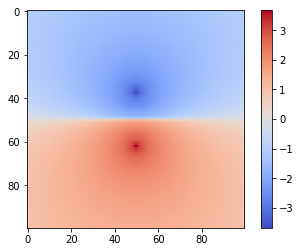

In [241]:
v = np.zeros_like(x + y)
for charge in charges:
    v += charge[0] / np.sqrt((charge[1] - x)**2 + (charge[2] - y)**2)

v = logify_v(v)
clim = np.max(np.abs(v))

img = plt.imshow(v, cmap="coolwarm", vmin=-clim, vmax=clim)
plt.colorbar(img)

## Monopole

In all of these cases we assume we are taking the x-pole about (0, 0)

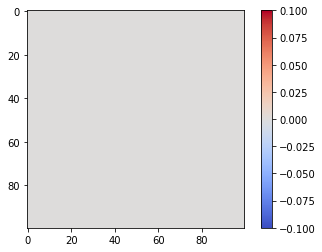

In [242]:
total_q = np.sum(charges[:,0])
r = np.sqrt(x**2 + y**2)

v = total_q / r
v = logify_v(v)

clim = np.max(np.abs(v))

img = plt.imshow(v, cmap="coolwarm", vmin=-clim, vmax=clim)
plt.colorbar(img)

## Dipole

[   0.  100.]


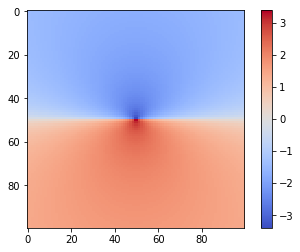

In [243]:
dipole_moment = np.sum(np.multiply(charges[:,0][:, np.newaxis], charges[:,1:]), axis=0)
print(dipole_moment)
r = np.sqrt(x**2 + y**2)
r_grid = np.zeros((len(x), len(y), 2))
r_grid[:,:,0] = x
r_grid[:,:,1] = y

v = np.dot(r_grid, dipole_moment) / r**2
v = logify_v(v)

clim = np.max(np.abs(v))
img = plt.imshow(v, cmap="coolwarm", vmin=-clim, vmax=clim)
plt.colorbar(img)

## Quadrupole

In [257]:
3 / 2 * np.dot(r_grid, charges[:,1:])[:,:,1]**2 - 1 / 2 * r**2


array([[-4.        , -3.91939598, -3.83920008, ...,  1.91837568,
         1.9593919 ,  2.        ],
       [-3.91939598, -3.84001632, -3.76104479, ...,  1.8802163 ,
         1.92000816,  1.9593919 ],
       [-3.83920008, -3.76104479, -3.68329762, ...,  1.84164881,
         1.8802163 ,  1.91837568],
       ..., 
       [ 1.91837568,  1.8802163 ,  1.84164881, ..., -3.68329762,
        -3.76104479, -3.83920008],
       [ 1.9593919 ,  1.92000816,  1.8802163 , ..., -3.76104479,
        -3.84001632, -3.91939598],
       [ 2.        ,  1.9593919 ,  1.91837568, ..., -3.83920008,
        -3.91939598, -4.        ]])